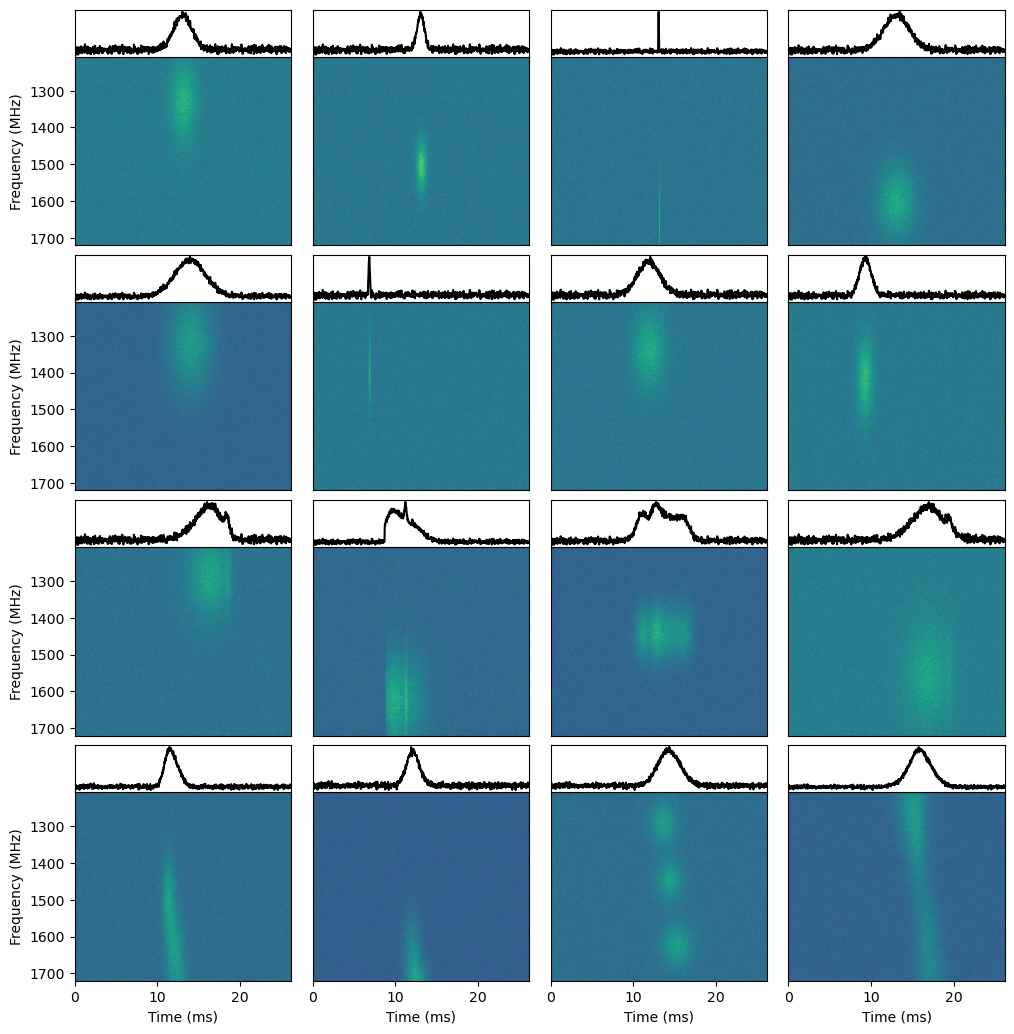

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Function to load a burst from a given directory
def load_burst_from_directory(directory):
    # List all the numpy array files in the directory
    file_list = [f for f in os.listdir(directory) if f.endswith(".npy")]
    bursts = []

    for file in file_list:
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(directory, file))
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)
        snr = np.max(lightcurve)
        if snr > 20:
            bursts.append((dynamic_spectra_w_pulse, lightcurve, snr))

    return bursts

# List of directories containing the saved data
directories = ["simulated_simple_bursts_v2", "simulated_scattered_bursts_v3", "simulated_complex_bursts_v2", "simulated_drifting_bursts_v2"]

fig, axs = plt.subplots(4, 4, figsize=(12, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, directory in enumerate(directories):
    bursts = load_burst_from_directory(directory)
    for j in range(4):
        if j < len(bursts):
            dynamic_spectra_w_pulse, lightcurve, _ = bursts[j]
            time_step = 0.0000256  # Default time step in seconds
            extent = [0, dynamic_spectra_w_pulse.shape[0] * time_step * 1000, 1208, 1720]
            ax = axs[i, j]
            ax2 = ax.inset_axes([0, 1, 1, 0.25])
            im = ax.imshow(dynamic_spectra_w_pulse.T, aspect="auto", cmap="viridis", extent=extent)
            ax.invert_yaxis()
            
            # Add x-axis labels only to the 4 bottom plots
            if i == 3:
                ax.set_xlabel("Time (ms)")
                ax.tick_params(axis='x', bottom=True, top=False)
            else:
                ax.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
            
            # Add y-axis labels only to the 4 leftmost plots
            if j == 0:
                ax.set_ylabel("Frequency (MHz)")
                ax.tick_params(axis='y', left=True, right=False)
                # ax2.set_ylabel("SNR")
                ax2.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=False)
            else:
                ax.tick_params(axis='y', left=False, right=False, labelleft=False)
                ax2.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=False,
               labelbottom=False)

            # Create a new subgrid for the lightcurve above the dynamic spectrum
            ax2.plot(np.arange(dynamic_spectra_w_pulse.shape[0]) * time_step * 1000, lightcurve, 'k')
            ax2.set_xlim(0, dynamic_spectra_w_pulse.shape[0] * time_step * 1000)  # Adjust the x-axis limit
            ax2.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=False,
               labelbottom=False)
        else:
            axs[i, j].axis('off')

plt.show()